In [1]:
from sklearn.datasets import fetch_openml

In [2]:
MNIST = fetch_openml("MNIST_784", version = 1)

In [3]:
MNIST.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, Y = MNIST['data'], MNIST['target']

In [5]:
X.shape

(70000, 784)

In [6]:
Y.shape

(70000,)

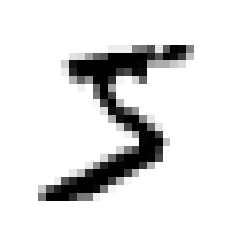

In [7]:
# Let's take a peak at one of the images
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()

In [8]:
Y[0]

'5'

In [9]:
# Note that 5 is a string, most Ml algo doesn't deal with Strings, so let's cast it to int
import numpy as np
Y= Y.astype(np.uint8)

In [10]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [11]:
# Training Binary Classification: Let's make a binary classifier to predict whether a digit is 5 or not 5
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)

In [12]:
# for this work, we can use SGD (Stochastic Gradient Descent Classifier) or SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(random_state = 43)
SGD.fit(x_train, y_train5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=43, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
SGD.predict([some_digit])

array([ True])

our binary classifier is working fine.

In [14]:
# Measuring accuracy using cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(x_train, y_train5):
    clone_clf = clone(SGD)
    #print(train_index, test_index)
    x_train_fold = x_train[train_index]
    y_train_fold = y_train5[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train5[test_index]
    
    clone_clf.fit(x_train_fold, y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred)) 

0.9629
0.96655
0.9638


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGD, x_train, y_train5, cv = 3,scoring = "accuracy")

array([0.9629 , 0.96655, 0.9638 ])

In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [17]:
never_5_classifier = Never5Classifier()


In [18]:
cross_val_score(never_5_classifier, x_train, y_train5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SGD, x_train, y_train5, cv = 3)

In [20]:
y_train_pred

array([False, False, False, ...,  True, False, False])

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5, y_train_pred)

array([[53756,   823],
       [ 1312,  4109]], dtype=int64)

In [22]:
y_train_perfect_prediction = y_train5
confusion_matrix(y_train5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Precision = TP/(TP + FP)

TP is the number of true Positives, and FP is the number of false positives. A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct ( precision = 1/1 = 100% ). But this would not be very useful, since classifier would ignore all but one positive instance. So  precision is typically used along with another metric named recall, also called sensitivity or the true positive rate ( TPR): This is the ratio of positive instances that are correctly detected by the classifier. 

recall = TP/ (TP + FN)

FN is ofcourse False Negatives.


In [23]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train5, y_train_pred), recall_score(y_train5, y_train_pred))

0.8331305758313058 0.7579782327983767


In [24]:
from sklearn.metrics import f1_score
f1_score(y_train5, y_train_pred)

0.7937795807978364

In [25]:
y_score = SGD.decision_function([some_digit])
y_score

array([1633.17856965])

In [26]:
threshold = 0
scores = SGD.decision_function(x_train)

In [27]:
y_predict_2 = (scores >= threshold)

In [28]:
precision_score(y_train5, y_predict_2)

0.7648170417454045

In [29]:
recall_score(y_train5, y_predict_2)

0.8212506917542889

In [30]:
f1_score(y_train5, y_predict_2)

0.7920298879202988

In [31]:
threshold = 2000
y_predict_3 = (scores >= threshold)

In [32]:
precision_score(y_train5, y_predict_3)

0.9160537661678925

In [33]:
recall_score(y_train5, y_predict_3)

0.6662977310459325

In [34]:
f1_score(y_train5, y_predict_3)

0.7714651858180265

In [35]:
Y_scores_curve = cross_val_predict(SGD, x_train, y_train5, cv = 3, method = 'decision_function')

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precisions, recalls, thresholds = precision_recall_curve(y_train5, Y_scores_curve)

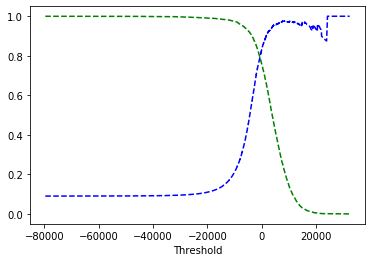

In [38]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'b--', label = "Precision")
    plt.plot(threshold, recall[:-1], "g--", label = "Recall")
    plt.xlabel('Threshold')
    

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()



In [39]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.905)] # ~7816

In [40]:
y_train_pred_90 = (scores >= threshold_90_precision)

In [41]:
#precision_score(y_train5,)
precision_score(y_train5, y_train_pred_90)

0.9032492725509215

In [42]:
recall_score(y_train5, y_train_pred_90)

0.6871425936174138

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train5, y_predict_2)

[0.         0.02508291 1.        ] [0.         0.82125069 1.        ]


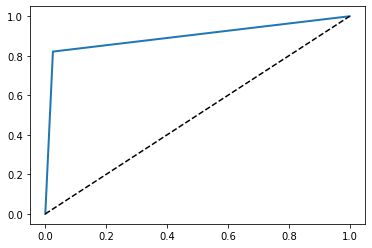

In [44]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0, 1], 'k--') #Dashed diagonal
    #plt.plot([1,0.5], [0,1], 'g--')

print(fpr,tpr)
plot_roc_curve(fpr,tpr)
plt.show()

In [45]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train5, cv = 3, method = "predict_proba")

C:\Users\Shashank Dwivedi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shashank Dwivedi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shashank Dwivedi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
y_score_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train5, y_score_forest)

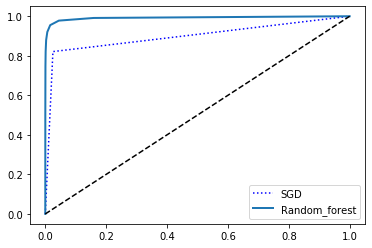

In [47]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random_forest")
plt.legend(loc = "lower right")
plt.show()


In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5, y_score_forest)

0.9920527492698306

In [49]:
roc_auc_score(y_train5, y_predict_2)

0.8980838922044866

Whereas binary classifiers distinguish between two classes, 
multiclass classifiers can distinguish between more than two classes.

Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes classifiers) are capable of handling multiple classes natively.Others ( such as logistic regression or Support Vector Machine classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.

One way to create a system that can classify the digit images into 10 classes is to train 10 binary classifiers, one for each digit ( a 0-detector, a 1-detector, a 2-dectector, and so on). then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the **one-versus-the-rest(OVR) strategy** ( also called one-versus-all).

**Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvR or OvO, depending on the algorithm.**

**OvO Strategy**
Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the **one-versus-one(OvO) strategy**. if there are N classes, you need to train Nx(N-1)/2 classifiers. For the mnist problem, this means training 45 binary classifier! when you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the **most duels**. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.


In [50]:
# Trying this with Support Vector machine
#from sklearn.svm import SVC
#svm_clf = SVC()
#svm_clf.fit(x_train, y_train) # y_train, not y_train5
#svm_clf.predict([some_digit])

If you call the decision_function() method, you will see that it returns 10 scores per instance( instead of just 1). That's one score per class:

In [51]:
#some_digit_scores = svm_clf.decision_function([some_digit])
#some_digit_scores

In [52]:
#the highest score is indeed the one corresponds to class 5.
#np.argmax(some_digit_scores)

In [53]:
#svm_clf.classes_

In [54]:
#svm_clf.classes_[5]

When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself, but in general you won't be so lucky.

If you want to force Scikit-Learn to use one_versus_one or one-versus-the-rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor ( it doesn't even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC.

In [55]:
#from sklearn.multiclass import OneVsRestClassifier
#ovr_clf = OneVsRestClassifier(SVC())
#ovr_clf.fit(x_train, y_train)
#ovr_clf.predict([some_digit])

In [56]:
#len(ovr_clf.estimators_)

In [57]:
SGD.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=43, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
SGD.predict([some_digit])

array([5], dtype=uint8)

In [59]:
# This time scikit-learn did not have to run OvR or OvO because SGD
# classifiers can directly classify instances into multiple classes

In [60]:
# The decision_function() method now returns one value per class.
# let's look at the score that the SGD classifier assigned to each class:
SGD.decision_function([some_digit])

array([[-33088.79384069, -27918.7618197 , -12448.51881789,
          -185.8380577 , -27615.83846365,   6859.76366877,
        -24000.69970261, -11544.65996835,  -5204.36251823,
        -10775.95441337]])

In [ ]:
cross_val_score(SGD, x_train, y_train, cv = 3, scoring = "accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(SGD, x_train_scaled, y_train, cv = 3, scoring = "accuracy")

In [ ]:
x_train.shape

In [ ]:
x_train_scaled.shape

### Error Analysis

You'd explore data preparation options, try out multiple models( shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV). and automate as much as possible. Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

First, look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier:


In [ ]:
y_train_pred = cross_val_predict(SGD, x_train_scaled, y_train, cv = 3)
conf_mx  = confusion_matrix(y_train, y_train_pred)
conf_mx

*That's a lot of number. It's often more convenient to look at an image representation of the confusion matrix, Matplotlib's matshow() function:*

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

This Confusion matrix looks pretty good, since most images are one the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier doesn't perform as well on 5s as on other digits. in fact, you can verify that both are the case.

Let's focus the plot on the error. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors.

In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
# fill the diagonal with zeros to keep only the errors, and plot the results:


In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()